In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [2]:
# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target  # House price

# View sample data
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Check for missing values
print(df.isnull().sum())

# Define features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [4]:
# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)

# Evaluate
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.2f}")


Linear Regression MSE: 0.56


In [5]:
# Train Ridge model
ridge_reg = Ridge(alpha=1.0)  # Try different alpha values (0.1, 1, 10)
ridge_reg.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.2f}")


Ridge Regression MSE: 0.56


In [6]:
# Train Lasso model
lasso_reg = Lasso(alpha=0.1)  # Try different alpha values (0.01, 0.1, 1)
lasso_reg.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

# Check how many features were removed (weights set to zero)
num_features_removed = np.sum(lasso_reg.coef_ == 0)
print(f"Lasso removed {num_features_removed} features")


Lasso Regression MSE: 0.61
Lasso removed 2 features


C:\Users\HP\AppData\Local\Temp\ipykernel_43516\2568304234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette="Blues")


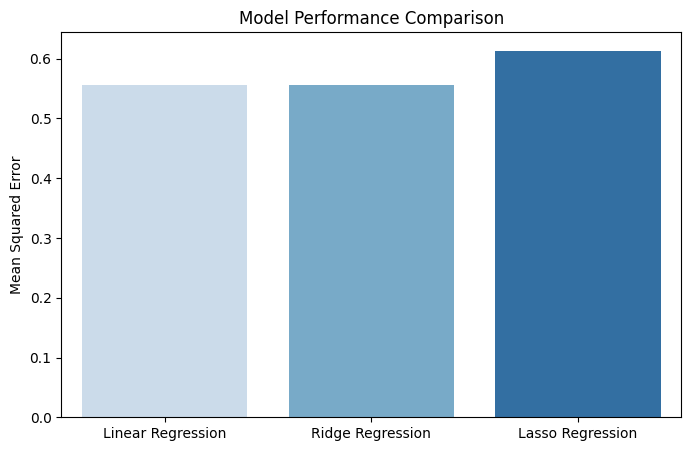

In [7]:
# Compare MSE values
models = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
mse_values = [mse_lin, mse_ridge, mse_lasso]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mse_values, palette="Blues")
plt.ylabel("Mean Squared Error")
plt.title("Model Performance Comparison")
plt.show()
